In [28]:
### load data [1000, 244, 244, 3]
import numpy as np

data_x = np.load("data_image_cnn_1000.npy")
data_y = np.load("data_genre_1000.npy")

In [29]:
### change data type
data_x = np.float16(data_x)
print (data_x.dtype)

data_y = np.int16(data_y)
print (data_y.dtype)

float16
int16


In [30]:
print(data_x.shape)
print(data_y.shape)

(1000, 224, 224, 3)
(1000, 8)


#### Sampled Data (n = 1000) for CNN model:
X: data_image_cnn (1000 x 224 x 224 x 3)

y: data_genre (1000 x 8)

In [31]:
from __future__ import print_function

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout

from keras.optimizers import SGD

from keras import initializers
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

from keras import backend as K

import matplotlib.pyplot as plt

In [39]:
he = initializers.he_normal()  # initializer

### ------- Baseline CNN - Layers ------- ###
model = Sequential()
# add [kernel_initializer] and [kernel_regularizer] for each activation layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 4, activation='relu', 
                 kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01),
                 name = "block1_conv1",
                 input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(3, 3), name = "block1_pool"))
model.add(Dropout(0.5))  # dropout layer
model.add(Conv2D(32, kernel_size=(3, 3), strides = 2, activation='relu', 
          kernel_initializer=he, kernel_regularizer=regularizers.l2(0.01), name = "block2_conv1"))
model.add(MaxPooling2D(pool_size=(2, 2), name = "block2_pool"))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# and an output layer
model.add(Dense(8, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 56, 56, 32)        896       
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 18, 18, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 18, 18, 32)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 8, 8, 32)          9248      
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_24 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_69 (Dense)             (None, 64)                32832     
__________

In [33]:
### Parameters
lr = 0.001
momentum = 0.9
batch_size = 64
epochs = 100

In [40]:
## learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.2, patience=10, min_lr=0.0001)

## early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_acc', patience=50)

callbacks_list = [early_stopping, reduce_lr]

In [41]:
### ------- Baseline CNN - Optimization ------- ###
sgd = SGD(lr=lr, momentum=momentum)  # momentum = [0.9, 0.99]
model.compile(loss='binary_crossentropy',
                  optimizer=sgd,
                  metrics=['accuracy'])

In [42]:
### ------- Baseline CNN - Train Model ------- ###
history0 = model.fit(data_x, data_y,
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=0,
                        validation_split=0.2,
                        callbacks = callbacks_list)


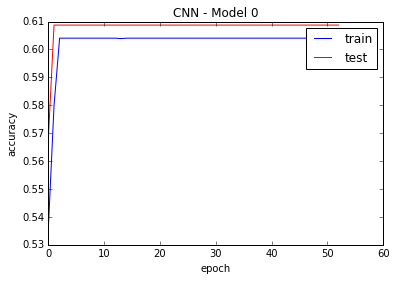

In [43]:
### Baseline CNN - Evaluation ###
plt.plot(history0.history['acc'], color = 'blue', label = 'train')
plt.plot(history0.history['val_acc'], color = 'red', label = 'test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title('CNN - Model 0')
plt.show()

Question:
- error: OOM when [Trainable params] reaches ~ 70,000
- what to tune when acc stagnize
- shared variable ampng layers (kernel_initializer=he, kernel_regularizer, ...)
- use of early_stop and reduce_lr or lr_decay
- where is dropput() layer